In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=500,centers=5,n_features=5,random_state=3)


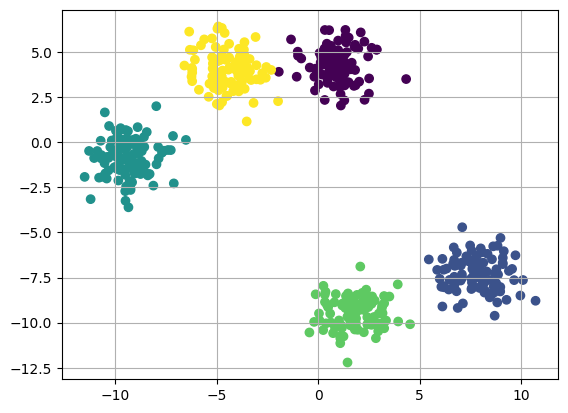

In [6]:
fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [13]:
k=5

colors = ['green','yellow','blue','cyan','red']

clusters={}

for idx in range(k):
    center= 10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    cluster={
        'center' : center,
        'points' : [],
        'color'  : colors[idx]
    }
    
    clusters[idx]=cluster

In [15]:
clusters


{0: {'center': array([ 6.16694584,  0.97569044, -2.99900848, -6.0782264 ,  8.17402733]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-6.48976299, -4.70164158, -2.3503684 , -3.65460904, -5.99836679]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ 0.61084322, -6.89140063,  2.73861618, -6.64147584,  8.81954155]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-3.01912851,  2.27034328, -4.03188212, -7.19584951, -1.36384877]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([ 1.21290986,  8.89734223,  2.47378308, -7.24124148, -0.9723192 ]),
  'points': [],
  'color': 'red'}}

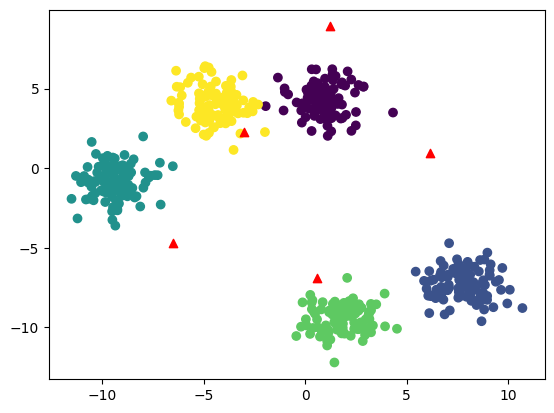

In [16]:
plt.scatter(X[:,0],X[:,1],c=y)

for i in clusters :
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker='^',c='red')
plt.show()

In [17]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [18]:
#Implementing E step

def assign_clusters():
    for idx in range(X.shape[0]):
        dist=[]
        
        curr_x=X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
            
        curr_cluster=np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [22]:
#Implementing M step

def update_clusters():
    for idx in range(k):
        pts=np.array(clusters[idx]['points'])
        if pts.shape[0] >0 :
            new_center=pts.mean(axis=0)
            clusters[idx]['center']=new_center
            
            clusters[idx]['points']=[]

In [23]:
#Define plot clusters

def plot_clusters():
    for i in clusters :
        pts=np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],c='black',marker='^')
        

<function __main__.update_clusters()>

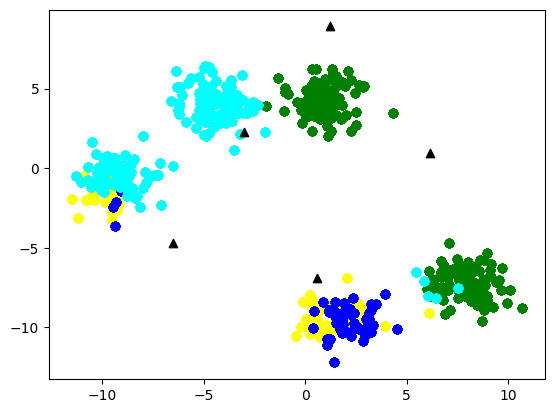

In [31]:
assign_clusters()
plot_clusters()
update_clusters

SCIKIT-LEAN K-MEANS

In [32]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters = 5)

In [34]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

In [35]:
km.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [36]:
centers = km.cluster_centers_

In [37]:
labels = km.labels_

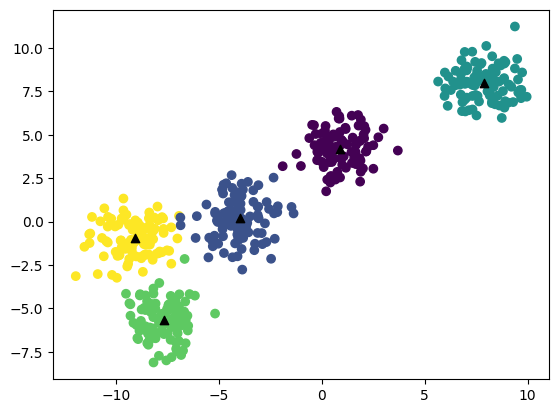

In [40]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(centers[:,0],centers[:,1],c='black',marker='^')
plt.show()